In [1]:
import twint
import nest_asyncio
import pandas as pd
from pathlib import Path
nest_asyncio.apply()
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\jdbet\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jdbet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jdbet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jdbet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Import List of Crypto Project's Twitter Handles From Txt File
# opening the file in read mode
my_file = open("master_twitter_list.txt", "r")
# reading the file
data = my_file.read()
# replacing end splitting the text 
# when newline ('\n') is seen.
master_twitter_list = data.split("\n")

In [3]:
#Create empty list to save tweets 
Twitter_df = []

In [4]:
#Get yesterday's date
yesterday_datetime = datetime.now() - timedelta(days=1)

yesterday = str(yesterday_datetime.strftime('%Y-%m-%d'))

print(yesterday)

2022-04-08


In [5]:
#Scrape Crypto tweets function
def crypto_tweets(username):
    c = twint.Config()
    c.Username = username
    c.Since = yesterday
    c.Pandas = True
    twint.run.Search(c)

In [6]:
#Loop through all the twitter usernames for tweets
for crypto in master_twitter_list:
    crypto_tweets(crypto)
    single_df = twint.storage.panda.Tweets_df
    Twitter_df.append(single_df)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1512434964897447942 2022-04-08 08:19:29 -0600 <_PIVX> @PIVXcommunity #PIVX is #zkPoS 🔥
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1512738612164677635 2022-04-09 04:26:05 -0600 <2crazylive> Like if you agree that the #NFT space will explode on the #Cardano network.   #Ethereum $ETH #Solana $SOL #Cardano $ADA
1512662430203195392 2022-04-08 23:23:21 -0600 <2crazylive> Don't forget that our staking platform is now live. Head over to our website to stake your tokens! 🥳 💪🏼👇   https://t.co/GJU4EXlrlF  #Ethereum $ETH #BinanceSmartChain $BSC #DeFi #NFT #NFTs
1512661968317992961 2022-04-08 23:21:31 -0600 <2crazylive> @SnoopDogg @shaycarl That flex was 🔥. Would you love to collab someday?👀
1512452974966198276 2022-04-08 09:31:03 -0600 <2crazylive> Should we introduce 2Crazy NFTs on Cardano?🤔  #Cardano $ADA #NFTs #NFT #Solana $SOL
1512387981608378379 2022-04-08 05:12:48 -0600 <2cr

In [7]:
#Save tweets to DataFrame
current_tweets_df = pd.concat(Twitter_df)


In [8]:
#Clean Dateframe to only keep needed columns
all_tweets_strings = current_tweets_df[['username','tweet','link', 'date']]
all_tweets_strings.reset_index(inplace=True, drop=True)
all_tweets_strings

,username,tweet,link,date
0,_PIVX,@PIVXcommunity #PIVX is #zkPoS 🔥,https://twitter.com/_PIVX/status/1512434964897...,2022-04-08 08:19:29
1,2crazylive,Like if you agree that the #NFT space will exp...,https://twitter.com/2crazylive/status/15127386...,2022-04-09 04:26:05
2,2crazylive,Don't forget that our staking platform is now ...,https://twitter.com/2crazylive/status/15126624...,2022-04-08 23:23:21
3,2crazylive,@SnoopDogg @shaycarl That flex was 🔥. Would yo...,https://twitter.com/2crazylive/status/15126619...,2022-04-08 23:21:31
4,2crazylive,Should we introduce 2Crazy NFTs on Cardano?🤔 ...,https://twitter.com/2crazylive/status/15124529...,2022-04-08 09:31:03
...,...,...,...,...
859,YOPfi,And then there was one! 🪄 4 of 5 $YOP vaults ...,https://twitter.com/YOPfi/status/1512449500836...,2022-04-08 09:17:15
860,ZeroSwapLabs,🤔Are you ready to Test Your Knowledge of the @...,https://twitter.com/ZeroSwapLabs/status/151279...,2022-04-09 07:58:04
861,ZeroSwapLabs,👋Zeemunity &amp; #Web3 enthusiasts Join @a17j...,https://twitter.com/ZeroSwapLabs/status/151234...,2022-04-08 02:05:56
862,zkTubeOfficial,We know our beloved❤️community is waiting eage...,https://twitter.com/zkTubeOfficial/status/1512...,2022-04-08 09:31:41


In [9]:
#Import List of Keywords from Txt File
my_file = open("final_list.txt", "r")
final_list_data = my_file.read()
final_list = final_list_data.split("\n")

In [10]:
#Clean tweets with final bigram list of words
todays_current_tweets_df = all_tweets_strings[all_tweets_strings['tweet'].str.contains('|'.join(final_list),regex=True)]
todays_current_tweets_df.reset_index(inplace=True, drop=True)
todays_current_tweets_df.to_csv('todays_tweets.csv')

In [11]:
todays_current_tweets_df

,username,tweet,link,date
0,AstarNetwork,Weekly Astar community roundup 🌟 🌟$1.6B TVL ...,https://twitter.com/AstarNetwork/status/151256...,2022-04-08 16:37:18
1,bitbns,$TLM is coming soon on Bitbns! Till then lear...,https://twitter.com/bitbns/status/151277521572...,2022-04-09 06:51:32
2,curateproject,💥 THIS WEEK at Curate $XCUR 💥 🟣@CoinSmart equ...,https://twitter.com/curateproject/status/15128...,2022-04-09 12:55:33
3,ErthaGame,"‼️ Get ready, Erthians! We're preparing for th...",https://twitter.com/ErthaGame/status/151289850...,2022-04-09 15:01:26
4,fearnfts,The FEAR Wolf NFT Website is Now Live! Visit:...,https://twitter.com/fearnfts/status/1512433650...,2022-04-08 08:14:16
5,H3RO3SCOIN,🌟We at H3RO3S are really excited to announce o...,https://twitter.com/H3RO3SCOIN/status/15127292...,2022-04-09 03:49:00
6,H3RO3SCOIN,🌟We at H3RO3S are really excited to announce o...,https://twitter.com/H3RO3SCOIN/status/15123360...,2022-04-08 01:46:24
7,join_hyve,Can you guess who's next? We continue to impro...,https://twitter.com/join_hyve/status/151251773...,2022-04-08 13:48:24
8,KonomiNetwork,We strive for excellence for our community 💪 ...,https://twitter.com/KonomiNetwork/status/15127...,2022-04-09 04:45:00
9,LaunchPoolXYZ,📢 Are You Ready To Know The Next Project On Of...,https://twitter.com/LaunchPoolXYZ/status/15123...,2022-04-08 04:31:27


<BarContainer object of 21 artists>

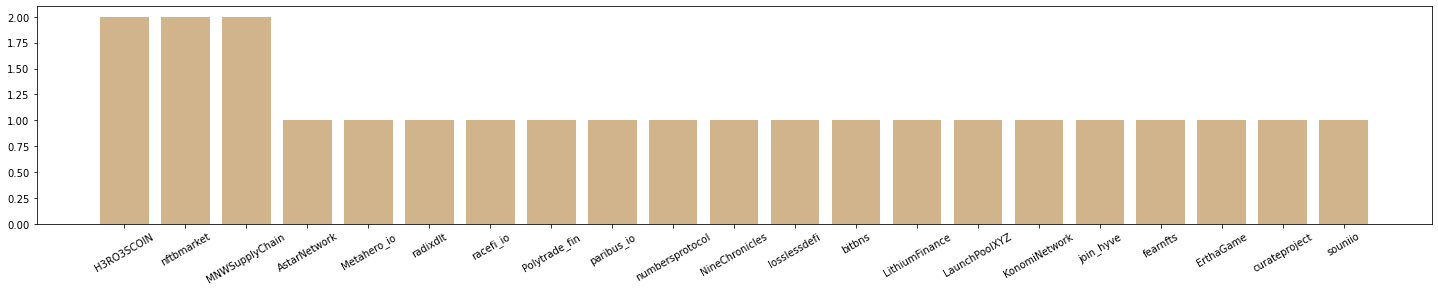

In [12]:
best_coins = todays_current_tweets_df["username"].value_counts().head(60)
best_coins_df = pd.DataFrame(best_coins)
plt.figure(figsize=(25,4))
plt.xticks(rotation=30 )

plt.bar(x=best_coins_df.index, height=best_coins_df['username'], color='tan')
